#Método dos momentos finitos

#Carga de dois fios condutores lado a lado(paralelos)

Para realizar o problema de fios paralelos condutores, devemos considerar algumas coisas:


*   Fios lado a lado, divididos em 10 subpartes(inicialmente)
*   Cada fio tem 10 cm de comprimento
*   Os fios estão separados a uma distância de 10cm
*   Potencial de cada fio: +2
*   Esquema dos fios no proximo bloco
*   Posso utilizar o método das imagens(Não ficou decidido se irei utilizar)
*   Fórmulas para a elaboração da matriz retiradas da equação (18) do artigo


In [ ]:
#importando numpy
import numpy as np


# Criando a matriz
Cada elemento da matriz terá uma fórmula padrão para cálculo enquanto que os elementos da diagonal tem uma fórmula diferente.

In [ ]:
#Criando cada elemento que será necessário para criar a matriz. Após o criar cada elemento, os dados serão adicionados através da fórmula na matriz 
delta = 0.1 #Valor de cada intervalo(10cm = 0.1m) --> No eixo x
#Criando o meu intervalo de delta achar o ponto x médio
posicoes_delta_x = []
for x in range(11):
  valor = delta*x
  posicoes_delta_x.append(round(valor,2))
#posicoes_delta_x 
#Encontrando o ponto médio entre cada delta
lista_ponto_medio_b1 = []
for x in range(10):
  pt_medio_x =(posicoes_delta_x[x]+posicoes_delta_x[x+1])/2
  print(pt_medio_x)
  lista_ponto_medio_b1.append(round(pt_medio_x,3))
lista_ponto_medio_b1
lista_ponto_medio_b2 = lista_ponto_medio_b1

0.05
0.15000000000000002
0.25
0.35
0.45
0.55
0.6499999999999999
0.75
0.8500000000000001
0.95


In [ ]:
lista_ponto_medio_b1 #Lista onde se encontram os pontos médios nos fios no eixo x

[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]

Criando as funções para substituir na matriz a ser criada

In [ ]:
#Criando os elementos da diagonal principal
#São 20 elementos, mas só vou colocar um, já que os valores são os mesmos.
import math
a = 0.01 # Raio do fio
diagonal = 2*math.log(delta/a) #Elemento diagonal da matriz
dist_y = 0.1  #distancia entre os centros dos fios 1 e 2
diagonal

4.605170185988092

In [ ]:
#Encontrando dmax,dmin, l,z
#NÃO CONSIDERAR!!!! - Achei uma forma melhor de resolver
dist_y = 0.1 
lista_dif = []
for x in range(9):
  lista_dif.append(round((lista_ponto_medio_b1[9] - lista_ponto_medio_b1[9-x])+0.1,2))
lista_dif
dmax = []
for x in range(9):
  dmax.append(round(lista_dif[x] +delta/2,3))
dmax
dmin = []
for x in range(9):
  dmin.append(round(lista_dif[x] -delta/2,3))
dmin

[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85]

## Substituindo na matriz

In [ ]:
#Criando a Matriz
matriz = np.matrix(np.arange(400.0).reshape((20,20))) #400.0 Matriz ser do tipo float
matriz
#adicionando o valor da diagonal
np.fill_diagonal(matriz,diagonal)
matriz

matrix([[  4.60517019,   1.        ,   2.        ,   3.        ,
           4.        ,   5.        ,   6.        ,   7.        ,
           8.        ,   9.        ,  10.        ,  11.        ,
          12.        ,  13.        ,  14.        ,  15.        ,
          16.        ,  17.        ,  18.        ,  19.        ],
        [ 20.        ,   4.60517019,  22.        ,  23.        ,
          24.        ,  25.        ,  26.        ,  27.        ,
          28.        ,  29.        ,  30.        ,  31.        ,
          32.        ,  33.        ,  34.        ,  35.        ,
          36.        ,  37.        ,  38.        ,  39.        ],
        [ 40.        ,  41.        ,   4.60517019,  43.        ,
          44.        ,  45.        ,  46.        ,  47.        ,
          48.        ,  49.        ,  50.        ,  51.        ,
          52.        ,  53.        ,  54.        ,  55.        ,
          56.        ,  57.        ,  58.        ,  59.        ],
        [ 60.        ,

In [ ]:
#func1 e func2 são a funções utilizada para achar os valores de dm+ dm-  da equação 16 do artigo
def func1(x,y):
  dmmpos1 = 1
  dmmneg1 = 1
  if x>=10 and y >=10:
    if x>y:
      dmmpos1 =(round((lista_ponto_medio_b1[x-10]-lista_ponto_medio_b1[y-10]),3)+delta/2)
      dmmneg1 =(round((lista_ponto_medio_b1[x-10]-lista_ponto_medio_b1[y-10]),3)-delta/2)
    else:
      dmmpos1 =(round((lista_ponto_medio_b1[y-10]-lista_ponto_medio_b1[x-10]),3)+delta/2)
      dmmneg1 =(round((lista_ponto_medio_b1[y-10]-lista_ponto_medio_b1[x-10]),3)-delta/2)

  if x<10 and y <10:

    if x>y:
      dmmpos1 =(round((lista_ponto_medio_b1[x]-lista_ponto_medio_b1[y]),3)+delta/2)
      dmmneg1 =(round((lista_ponto_medio_b1[x]-lista_ponto_medio_b1[y]),3)-delta/2)
    else:
      dmmpos1 =(round((lista_ponto_medio_b1[y]-lista_ponto_medio_b1[x]),3)+delta/2)
      dmmneg1 =(round((lista_ponto_medio_b1[y]-lista_ponto_medio_b1[x]),3)-delta/2)
  return dmmpos1 ,dmmneg1
func1(0,1)

(0.15000000000000002, 0.05)

In [ ]:
def func2(x,y):
  if x>y:
    dmmpos11 =(round((lista_ponto_medio_b1[x-10]-lista_ponto_medio_b1[y]),3)+delta/2)
    dmmneg11 =(round((lista_ponto_medio_b1[x-10]-lista_ponto_medio_b1[y]),3)-delta/2)
  if y>x:
    dmmpos11 =(round((lista_ponto_medio_b1[y-10]-lista_ponto_medio_b1[x]),3)+delta/2)
    dmmneg11 =(round((lista_ponto_medio_b1[y-10]-lista_ponto_medio_b1[x]),3)-delta/2)
  return dmmpos11, dmmneg11 

In [ ]:
#Substituindo os dados da matriz
for x in range(20):
  for y in range(20):
    if x==y: #Para aos elementos da diagonal
      matriz[x,y] = diagonal
    elif x<10 and y<10:  #Para os elementos que estão no mesmo fio
      a = x
      b = y
      dmmpos1, dmmneg1 = func1(a,b)
      matriz[x,y] = math.log(dmmpos1/dmmneg1)
      #print(a,b)
    elif x>=10 and y>=10:
      a = x
      b = y
      dmmpos2, dmmneg2 = func1(a,b)
      matriz[x,y] = math.log(dmmpos2/dmmneg2)
      #print(a,b)
    else:  #Para os elementos que estão em dois fios
      a = x
      b = y
      dmmpos3,dmmneg3 = func2(a,b)
      matriz[x,y] = math.log((dmmpos3 + math.sqrt(dmmpos3**2 +dist_y**2))/(dmmneg3+ math.sqrt(dmmneg3**2 +dist_y**2)))
      print(a,b,dmmpos3,dmmneg3)




0 10 0.05 -0.05
0 11 0.15000000000000002 0.05
0 12 0.25 0.15000000000000002
0 13 0.35 0.25
0 14 0.45 0.35000000000000003
0 15 0.55 0.45
0 16 0.65 0.5499999999999999
0 17 0.75 0.6499999999999999
0 18 0.8500000000000001 0.75
0 19 0.9500000000000001 0.85
1 10 -0.05 -0.15000000000000002
1 11 0.05 -0.05
1 12 0.15000000000000002 0.05
1 13 0.25 0.15000000000000002
1 14 0.35 0.25
1 15 0.45 0.35000000000000003
1 16 0.55 0.45
1 17 0.65 0.5499999999999999
1 18 0.75 0.6499999999999999
1 19 0.8500000000000001 0.75
2 10 -0.15000000000000002 -0.25
2 11 -0.05 -0.15000000000000002
2 12 0.05 -0.05
2 13 0.15000000000000002 0.05
2 14 0.25 0.15000000000000002
2 15 0.35 0.25
2 16 0.45 0.35000000000000003
2 17 0.55 0.45
2 18 0.65 0.5499999999999999
2 19 0.75 0.6499999999999999
3 10 -0.25 -0.35
3 11 -0.15000000000000002 -0.25
3 12 -0.05 -0.15000000000000002
3 13 0.05 -0.05
3 14 0.15000000000000002 0.05
3 15 0.25 0.15000000000000002
3 16 0.35 0.25
3 17 0.45 0.35000000000000003
3 18 0.55 0.45
3 19 0.65 0.549999

# Resolvendo o sistema linear 

In [ ]:
#Utilizando a função np.linalg.solve
permissividade = 8.854*10**(-12)  #permissividade elétrica no vácuo
npi = 3.14
resultado_final = 4*npi*permissividade*2  #Resultado de 4piepsilon*2volts
#Criando o array de resultados, considerando que a tensão é a mesma em todos os pontos das barras
B = np.repeat(resultado_final,20 )
B
C = np.repeat(resultado_final,20)
for x in range(10):
  C[x+10] = (resultado_final*(-1))
C



array([ 2.2241248e-10,  2.2241248e-10,  2.2241248e-10,  2.2241248e-10,
        2.2241248e-10,  2.2241248e-10,  2.2241248e-10,  2.2241248e-10,
        2.2241248e-10,  2.2241248e-10, -2.2241248e-10, -2.2241248e-10,
       -2.2241248e-10, -2.2241248e-10, -2.2241248e-10, -2.2241248e-10,
       -2.2241248e-10, -2.2241248e-10, -2.2241248e-10, -2.2241248e-10])

In [ ]:
#Resolvendo o sistema linear
condutividade = np.linalg.solve(matriz,B)
condutividade

array([2.38769838e-11, 1.71339842e-11, 1.60107561e-11, 1.54707796e-11,
       1.52520026e-11, 1.52520026e-11, 1.54707796e-11, 1.60107561e-11,
       1.71339842e-11, 2.38769838e-11, 2.38769838e-11, 1.71339842e-11,
       1.60107561e-11, 1.54707796e-11, 1.52520026e-11, 1.52520026e-11,
       1.54707796e-11, 1.60107561e-11, 1.71339842e-11, 2.38769838e-11])

In [ ]:
cond2 = np.linalg.solve(matriz,C) #Alterando os valores do potencial
cond2

array([ 5.46397819e-11,  4.89004253e-11,  4.86581458e-11,  4.85278839e-11,
        4.84849600e-11,  4.84849600e-11,  4.85278839e-11,  4.86581458e-11,
        4.89004253e-11,  5.46397819e-11, -5.46397819e-11, -4.89004253e-11,
       -4.86581458e-11, -4.85278839e-11, -4.84849600e-11, -4.84849600e-11,
       -4.85278839e-11, -4.86581458e-11, -4.89004253e-11, -5.46397819e-11])

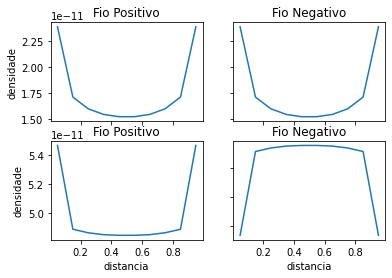

In [ ]:
#Plotando os gráficos
lista_nova = lista_ponto_medio_b2
lista_nova
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2)
axs[0,0].plot(lista_nova,condutividade[0:10])
axs[0,0].set_title('Fio Positivo')
axs[0,1].plot(lista_nova,condutividade[10:])
axs[0,1].set_title('Fio Negativo')
axs[1,0].plot(lista_nova,cond2[0:10])
axs[1,0].set_title('Fio Positivo')
axs[1,1].plot(lista_nova,cond2[10:])
axs[1,1].set_title('Fio Negativo')
for ax in axs.flat:
    ax.set(xlabel='distancia', ylabel='densidade')
for ax in axs.flat:
    ax.label_outer()


In [ ]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(lista_nova,condutividade[0:10] )


plt.subplot(2, 2, 3)
plt.plot(lista_nova, condutividade[10:])

#plt.subplot(2, 2, 3)
#plt.plot(x, y)

#plt.subplot(2, 2, 4)
#plt.plot(x, y)

plt.show()

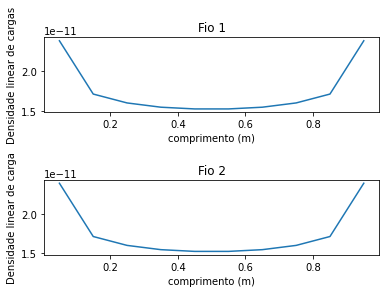

In [ ]:
fig, axs = plt.subplots(2, 1 )

axs[0].plot(lista_nova,condutividade[0:10])
axs[0].set_title('Fio 1')
axs[0].set_xlabel('comprimento (m)')
axs[0].set_ylabel('Densidade linear de cargas')
#fig.suptitle('This is a somewhat long figure title', fontsize=16)

axs[1].plot(lista_nova,condutividade[10:])
axs[1].set_xlabel('comprimento (m)')
axs[1].set_title('Fio 2')
axs[1].set_ylabel('Densidade linear de carga')

plt.subplots_adjust(hspace = 0.9)
plt.show()

In [ ]:
import pandas as pd
df2 = pd.DataFrame(lista_nova,condutividade[0:10]) 
#df1.rename('densidade linear de cargas', 'Comprimento')
df2
df



,0
2.387698e-11,0.05
1.713398e-11,0.15
1.601076e-11,0.25
1.547078e-11,0.35
1.525200e-11,0.45
1.525200e-11,0.55
1.547078e-11,0.65
1.601076e-11,0.75
1.713398e-11,0.85
2.387698e-11,0.95


In [ ]:
df=pd.DataFrame({"X(metros)":lista_nova, 
                 "Densidade Linear de carga":condutividade[0:10]}) 
df

,X(metros),Densidade Linear de carga
0,0.05,2.387698e-11
1,0.15,1.713398e-11
2,0.25,1.601076e-11
3,0.35,1.547078e-11
4,0.45,1.525200e-11
5,0.55,1.525200e-11
6,0.65,1.547078e-11
7,0.75,1.601076e-11
8,0.85,1.713398e-11
9,0.95,2.387698e-11
